In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb
sb.set()

In [13]:
from datetime import date

files = {
    'shtmax':'maximum_temp', 
    'shtmin':'minimum_temp', 
    'shtpre':'precipitation', 
    'shtsno':'snow_incomplete', 
    'shtsno_b':'snow'
}

for filename in files.keys():
    file = open('data/{0}.csv'.format(filename), 'w')
    header = "Date," + files[filename]
    data = ""
    for month in range(1, 13):
        # Get table
        table = open('combined/{0}{1}.txt'.format(filename, str(month).zfill(2)), 'r').read()
        # Read loop
        for item in table.split('\n'):
            day = 0
            for i in item.split():
                if day == 0:
                    year = i
                else:
                    value = i
                    data += (str(date(int(year), month, day)) + ',' + value + '\n')
                day += 1
    file.write(header + '\n' + data)
    
print('Data written to files.')

Data written to files.


In [14]:
# df = pd.read_table('combined/shtmax01.txt', sep="\s+", header=None, skiprows=1, index_col=0)
# df['Month'] = 'January'

shtmax = pd.DataFrame.from_csv('data/shtmax.csv')
shtmin = pd.DataFrame.from_csv('data/shtmin.csv')
shtpre = pd.DataFrame.from_csv('data/shtpre.csv')
shtsno = pd.DataFrame.from_csv('data/shtsno.csv')
shtsno_b = pd.DataFrame.from_csv('data/shtsno_b.csv')

shtmax.replace(-99, np.nan, inplace=True)
shtmin.replace(-99, np.nan, inplace=True)
shtpre.replace(-9900, np.nan, inplace=True)
shtsno.replace(-1, np.nan, inplace=True)
shtsno_b.replace(-1, np.nan, inplace=True)

s = shtmax.join([shtmin, shtpre, shtsno_b])

Questions
=====
1. Average high and low for the day and find change from previous day. Check to see if that correlates with precipitation.
2. Which years had white christmases? or not
3. Have a line plot of highs and lows (average per year) to see the trend
4. Look for extreme outliers of precipitation snow in august/rain in january
5. For each year how much precip is due to snowfall
6. which saturdays in the summer months have the least amount of rain
7. Isolate large storms by looking for consecutive days of rain
8. Find periods of drought
9. Day of maximum difference between high and low
10. Day with most rainfall
11. Hottest/coldest day in record

### Average high and low for the day and find change from previous day. Check to see if that correlates with precipitation.

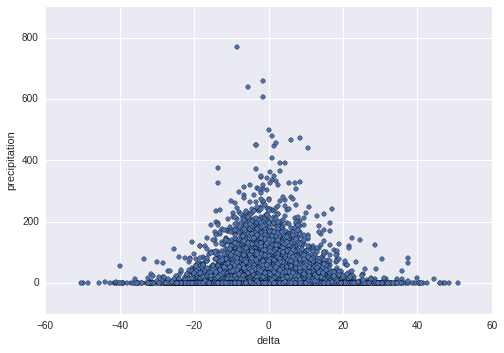

In [15]:
s['ave_temp'] = (s.maximum_temp + s.minimum_temp) / 2
s['delta'] = s.ave_temp.diff()
s.plot(x='delta', y='precipitation', kind='scatter')

# From the graph below, which has a bell curve shape, we can see that precipitation seems to increase
# when the temperature has not changed much from the previous day.

### Which years had white christmases? or not

In [61]:
s[(s.index.month == 12) & (s.index.day <= 25) & (s.index.year == 2009)]

,maximum_temp,minimum_temp,precipitation,snow,ave_temp,delta
Date,,,,,,
2009-12-01,51,23,0,0,37.0,29.5
2009-12-02,47,28,0,0,37.5,0.5
2009-12-03,32,25,4,0,28.5,-9.0
2009-12-04,27,10,1,0,18.5,-10.0
2009-12-05,35,12,0,0,23.5,5.0
2009-12-06,31,17,0,1,24.0,0.5
2009-12-07,27,17,6,1,22.0,-2.0
2009-12-08,25,13,8,12,19.0,-3.0
2009-12-09,25,10,72,0,17.5,-1.5


In [63]:
# A Christmas is 'white' if the temperature has not risen over 32 degrees since last snow in December.
# A Christmas may also be white if it snowed on Christmas, regardless of the temperature.

c = s[(s.index.month == 12) & (s.index.day <= 25)]

for year in range (1893, 2013):
    for day in range (1, 26):
        i = c.loc[str(year) + '-12-' + str(day)]
        if i.snow > 0:
            snow = True
        if (i.maximum_temp > 32 or i.minimum_temp > 32) and day != 25:
            snow = False
    if snow:
        print ('There was a white Christmas in ' + str(year) +'.')

There was a white Christmas in 1893.
There was a white Christmas in 1897.
There was a white Christmas in 1900.
There was a white Christmas in 1902.
There was a white Christmas in 1903.
There was a white Christmas in 1905.
There was a white Christmas in 1909.
There was a white Christmas in 1910.
There was a white Christmas in 1914.
There was a white Christmas in 1916.
There was a white Christmas in 1919.
There was a white Christmas in 1920.
There was a white Christmas in 1924.
There was a white Christmas in 1925.
There was a white Christmas in 1933.
There was a white Christmas in 1934.
There was a white Christmas in 1935.
There was a white Christmas in 1937.
There was a white Christmas in 1944.
There was a white Christmas in 1945.
There was a white Christmas in 1948.
There was a white Christmas in 1949.
There was a white Christmas in 1951.
There was a white Christmas in 1957.
There was a white Christmas in 1959.
There was a white Christmas in 1960.
There was a white Christmas in 1962.
T

### Have a line plot of highs and lows (average per year) to see the trend

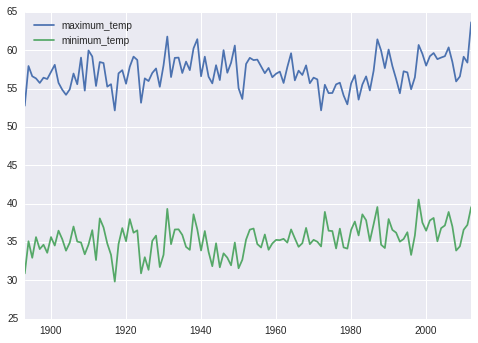

In [17]:
a = s[s.index.year < 2013]

p = a.groupby(a.index.year).mean().filter(['maximum_temp', 'minimum_temp']).plot()

### Look for extreme outliers of precipitation snow in august/rain in january

In [18]:
outliers = {
    'precipitation' : [1, 2, 11, 12],  # Rain is not expected in January, February, November, December
    'snow' : [5, 6, 7, 8]              # Snow is not expected in May, June, July, August
}

p = s[(s.precipitation > 0) & ((s.index.month == 12) | (s.index.month == 1))].precipitation
p.order(ascending=False)

print("Frankly, rain just isn't all that uncommon year round:\n" + str(p.order(ascending=False).head()))

Frankly, rain just isn't all that uncommon year round:
Date
1946-01-06    180
1894-12-15    150
1973-12-05    136
1975-12-14    134
1932-12-24    130
Name: precipitation, dtype: float64


In [19]:
sn = s[(s.snow > 0) & (s.index.month <= 9) & (s.index.month >= 4)].snow

print("Snow, on the other hand, is much less common:\n" + str(sn.order(ascending=False).head()))

Snow, on the other hand, is much less common:
Date
1973-04-09    11
2003-04-07     6
1979-04-02     5
1952-04-13     5
2011-04-19     4
Name: snow, dtype: float64


### For each year how much precip is due to snowfall

In [20]:
print(format(s.snow.sum() / (s.precipitation.sum() + s.snow.sum()), '%'))

1.108916%


### which saturdays in the summer months have the least amount of rain

In [21]:
# Get all Saturdays in the summer months
sat = s[(s.index.dayofweek == 5) & (s.index.month >= 6) & (s.index.month <= 8)]

# Get a sorted series of mean Saturday precipitation over every year
print('Average Saturday rainfall given by week of year:\n' + str(sat.groupby([sat.index.week]).mean().precipitation.order()))

Average Saturday rainfall given by week of year:
30     9.268908
35     9.481481
27     9.941176
33    10.466667
26    10.739496
23    11.059829
32    12.300000
28    12.596639
34    13.300000
31    14.908333
22    15.450000
25    15.756303
29    15.848739
24    17.864407
Name: precipitation, dtype: float64


### Isolate large storms by looking for consecutive days of rain

In [74]:
# A large storm is defined as a period of five consecutive days with at least 20 units of rain each day.
min_units = 20
min_days = 5

rained = False
length = 0
dates = []

for (date,ser) in s.sort().iterrows():
    if length == 0:
        start = date
    if s.loc[date].precipitation >= min_units:
        length += 1
    else:
        if length >= min_days:
            dates.append((start, date))
        start = date
        length = 0

for (i, j) in dates:
    print ("There was a large storm on " + str(i.date()) + " that let up on " + str(j.date()) + ".")

There was a large storm on 1938-09-06 that let up on 1938-09-11.
There was a large storm on 1941-05-27 that let up on 1941-06-01.
There was a large storm on 1965-09-17 that let up on 1965-09-22.
There was a large storm on 1968-06-23 that let up on 1968-06-28.
There was a large storm on 1980-08-08 that let up on 1980-08-15.
There was a large storm on 1983-06-27 that let up on 1983-07-02.
There was a large storm on 1993-06-16 that let up on 1993-06-21.
There was a large storm on 1995-04-07 that let up on 1995-04-13.
There was a large storm on 1999-07-17 that let up on 1999-07-22.
There was a large storm on 2007-05-31 that let up on 2007-06-05.
There was a large storm on 2007-08-18 that let up on 2007-08-25.


### Find periods of drought

In [77]:
# A drought is defined as a period of no rain for at least three weeks.
max_units = 0
min_days = 21

rained = False
length = 0
dates = []

for (date,ser) in s.sort().iterrows():
    if length == 0:
        start = date
    if s.loc[date].precipitation <= max_units:
        length += 1
    else:
        if length >= min_days:
            dates.append((start, date))
        start = date
        length = 0

for (i, j) in dates:
    print ("A drought began on " + str(i.date()) + " that let up on " + str(j.date()) + ".")

A drought began on 1893-10-28 that let up on 1893-11-21.
A drought began on 1894-06-27 that let up on 1894-07-19.
A drought began on 1894-08-11 that let up on 1894-09-06.
A drought began on 1894-11-13 that let up on 1894-12-11.
A drought began on 1895-02-07 that let up on 1895-03-06.
A drought began on 1895-03-07 that let up on 1895-03-31.
A drought began on 1895-09-23 that let up on 1895-11-07.
A drought began on 1897-03-13 that let up on 1897-04-04.
A drought began on 1897-09-17 that let up on 1897-10-19.
A drought began on 1897-12-21 that let up on 1898-01-12.
A drought began on 1898-11-26 that let up on 1898-12-19.
A drought began on 1901-12-30 that let up on 1902-01-20.
A drought began on 1903-10-16 that let up on 1903-11-15.
A drought began on 1904-01-22 that let up on 1904-02-19.
A drought began on 1904-11-11 that let up on 1904-12-02.
A drought began on 1906-03-13 that let up on 1906-04-05.
A drought began on 1907-02-07 that let up on 1907-02-28.
A drought began on 1907-12-30 t

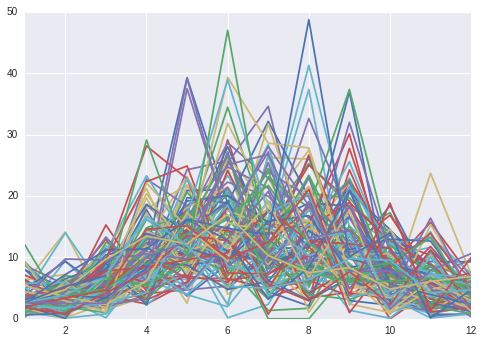

In [79]:
# This plot shows the average precipitation per month for each year. 
# Some droughts can be seen clearly, and it is obvious that it precipitates more in the summer months.

d = s.groupby([s.index.month, s.index.year]).mean().filter(['precipitation'])
d.precipitation.unstack().plot(legend=False)

### Day of maximum difference between high and low

In [80]:
(s.maximum_temp - s.minimum_temp).order(ascending=False).head(1)

Date
1948-02-16    78
dtype: float64

### Day with most rainfall

In [81]:
s.precipitation.order(ascending=False).head(1)

Date
1941-05-30    770
Name: precipitation, dtype: float64

### Hottest/coldest day in record

In [82]:
# Hottest Day
s.maximum_temp.order(ascending=False).head(1)

Date
1936-07-14    111
Name: maximum_temp, dtype: float64

In [83]:
# Coldest Day
s.minimum_temp.order(ascending=True).head(1)

Date
1951-01-30   -43
Name: minimum_temp, dtype: float64